        Features Name  Number of Data Points  Minimum Value  Maximum Value  \
0  housing_median_age                  20433            1.0           52.0   
1         total_rooms                  20433            2.0        39320.0   
2      total_bedrooms                  20433            1.0         6445.0   
3          population                  20433            3.0        35682.0   
4          households                  20433            1.0         6082.0   
5       median_income                  20433            0.5           15.0   

      Mean  Standard Deviation  IQ Range  Correlation with median_house_value  \
0    28.63               12.59     19.00                                 0.11   
1  2636.50             2185.27   1693.00                                 0.13   
2   537.87              421.39    351.00                                 0.05   
3  1424.95             1133.21    935.00                                -0.03   
4   499.43              382.30    324.00        

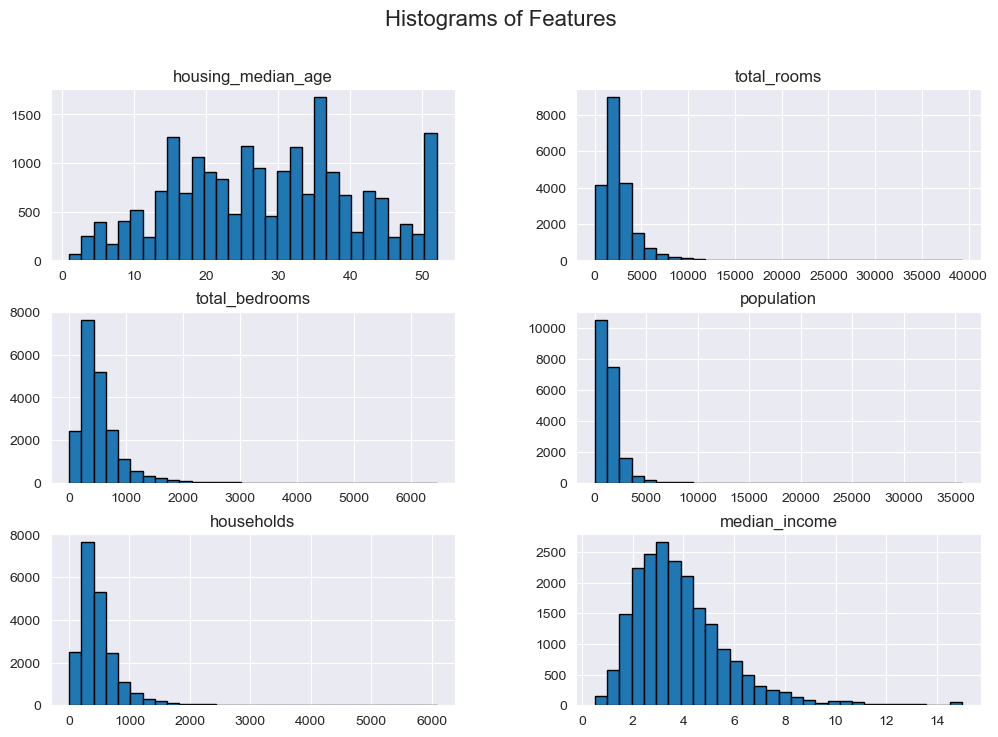

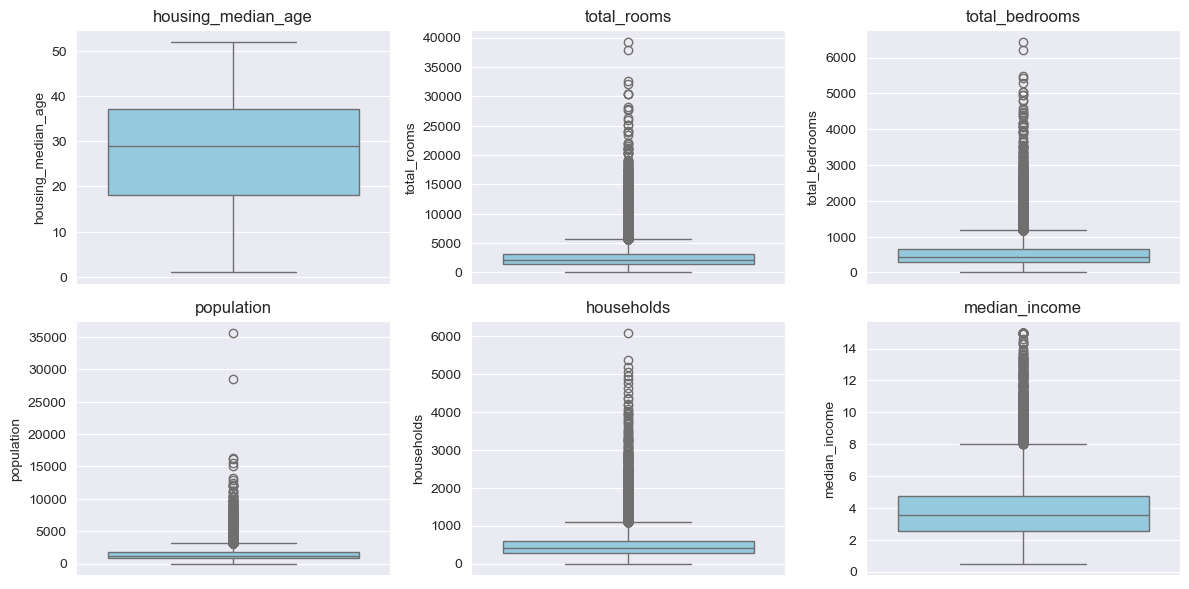

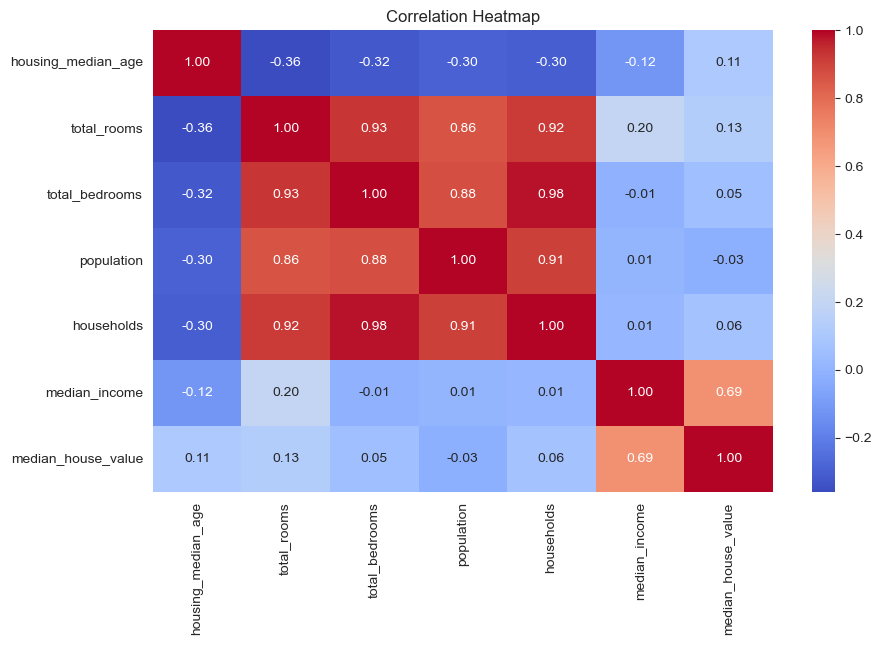

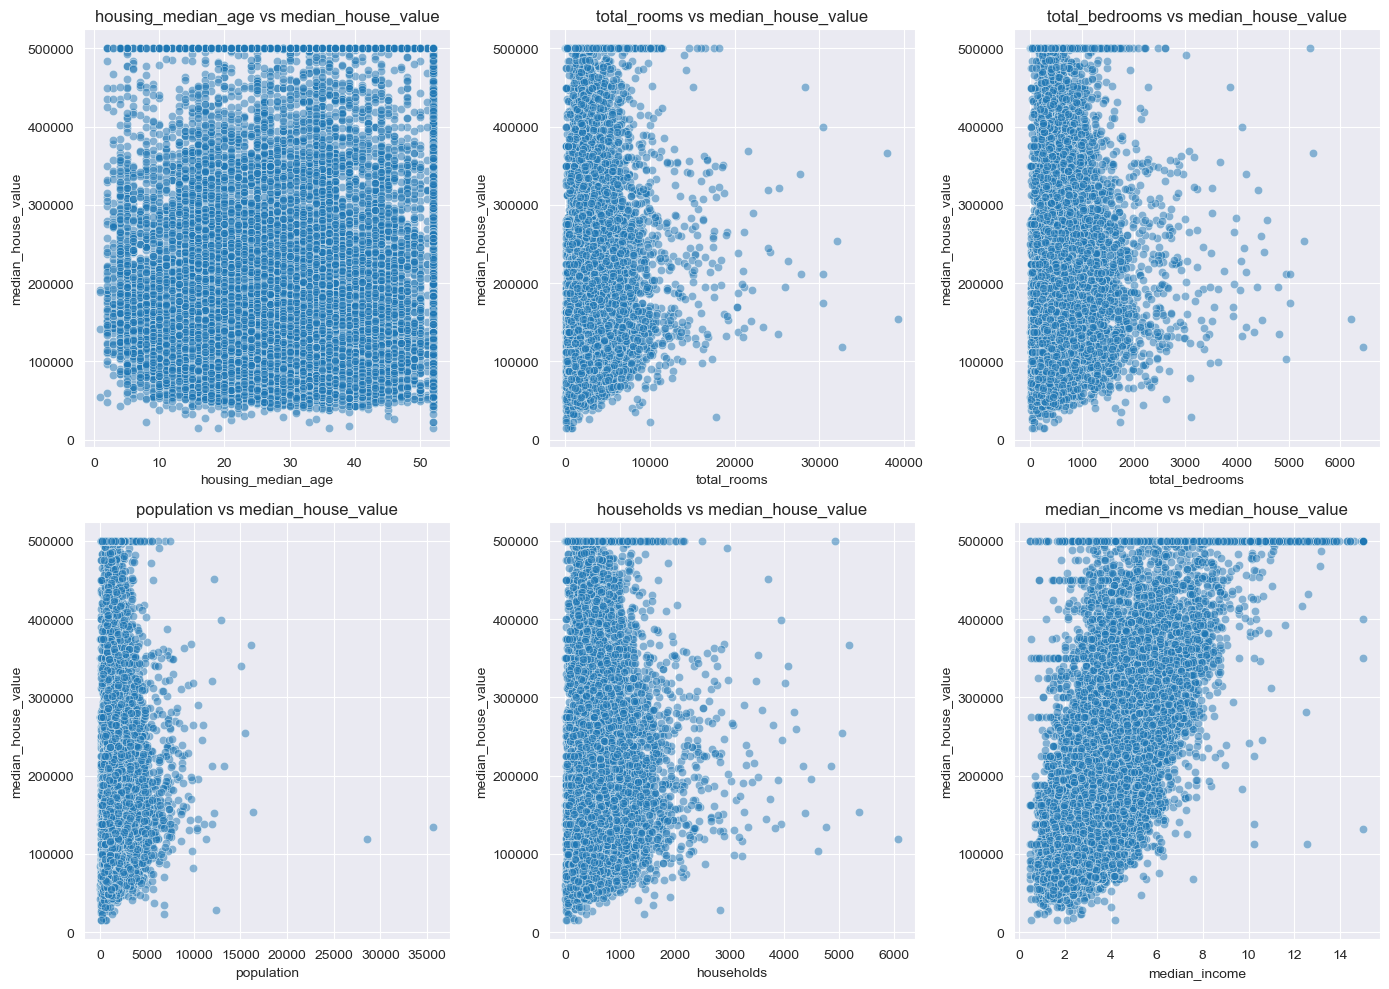

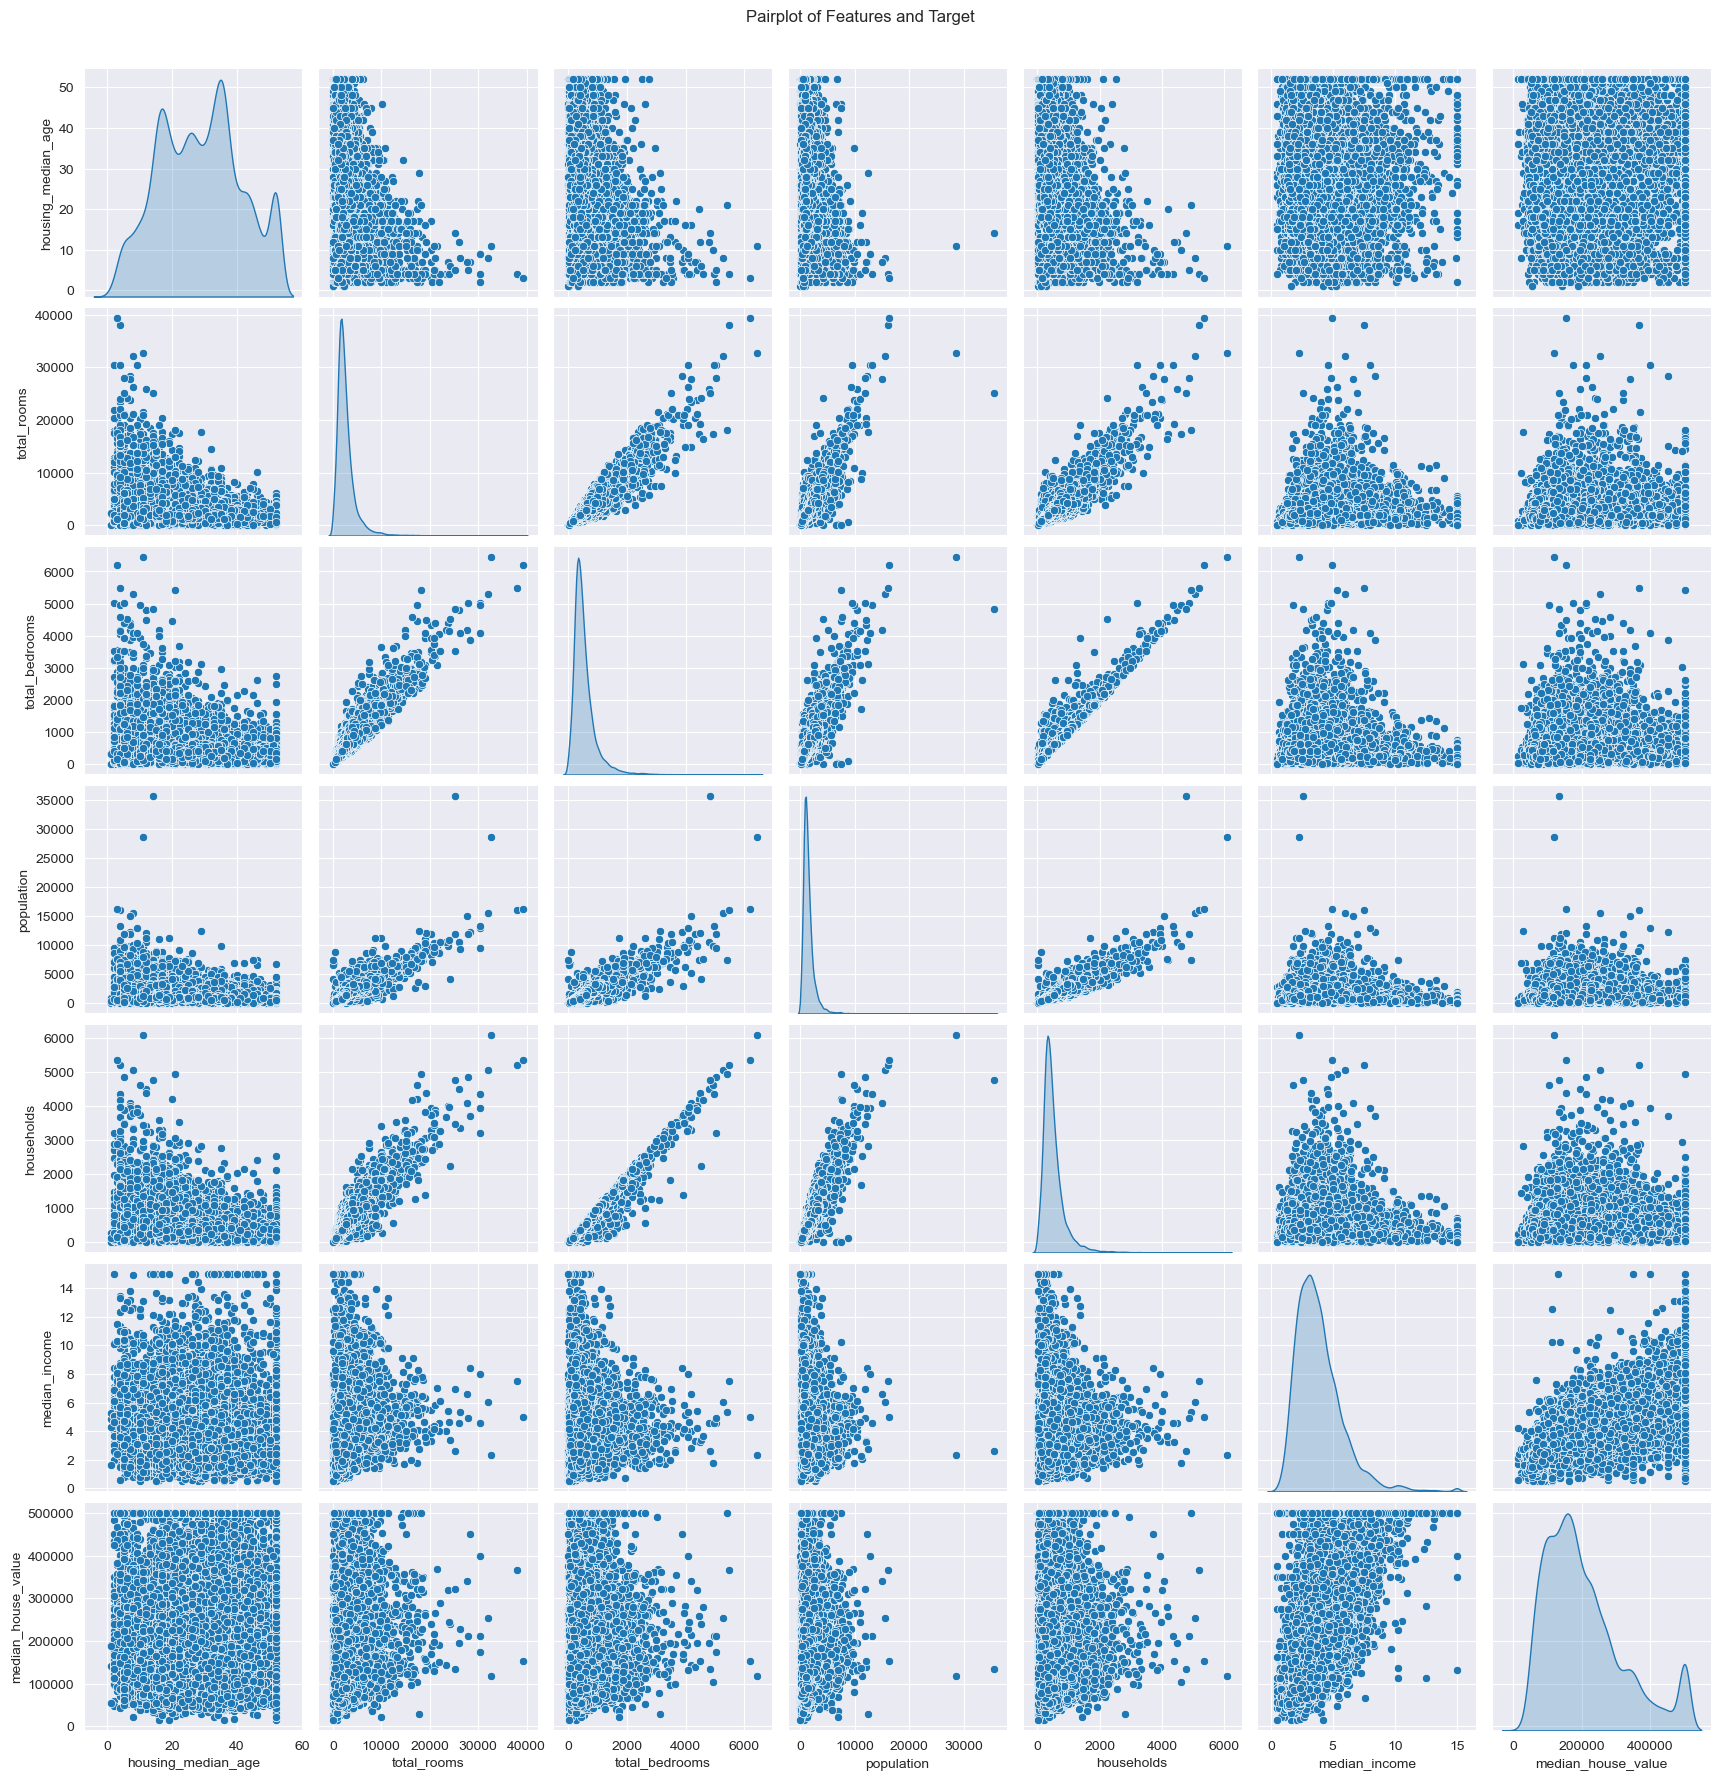

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("california_housing.csv")

# Drop unwanted columns
df = df.drop(["ocean_proximity", "latitude", "longitude"], axis=1)

# Drop rows with missing values
df = df.dropna()

# Select required features + target
target="median_house_value"
features = [col for col in df.columns if col!= target ]


df=df[features+[target]]
summary_table=pd.DataFrame ({'Features Name':features,
                            'Number of Data Points':[df[f].count()   for f in features],
                            'Minimum Value': [df[f].min()    for f in features],
                            'Maximum Value':[df[f].max()     for f in features],
                            'Mean':[df[f].mean()  for f in features],
                            'Standard Deviation':[df[f].std()  for f in features],
                            'IQ Range':[df[f].quantile(0.75)-df[f].quantile(0.25) for f in features],
                            f'Correlation with {target}':[df[f].corr(df[target]) for f in features] })

summary_table["Observation"] = summary_table[f"Correlation with {target}"].apply(
    lambda c: "Strong positive correlation" if c > 0.5 else (
              "Strong negative correlation" if c < -0.5 else
              "Weak / no clear correlation")
)

summary_table=summary_table.round(2)
print(summary_table)
summary_table.to_excel("california_housing_california.xlsx", index=False)


print("excel file created")

df[features].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

# -------------------------------
# 2. Boxplots for each feature
# -------------------------------
plt.figure(figsize=(12, 6))
for i, f in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[f], color="skyblue")
    plt.title(f)
plt.tight_layout()
plt.show()
# -------------------------------
# 3. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10, 6))
corr = df[features + [target]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# 4. Scatterplots: Feature vs Target
# -------------------------------
plt.figure(figsize=(14, 10))
for i, f in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[f], y=df[target], alpha=0.5)
    plt.title(f"{f} vs {target}")
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Pairplot for quick overview
# -------------------------------
sns.pairplot(df[features + [target]], diag_kind="kde")
plt.suptitle("Pairplot of Features and Target", y=1.02)
plt.show()

